**Course**: BIO-341 [_Dynamical systems in biology_](https://moodle.epfl.ch/course/info.php?id=14291)

**Professor**: _Julian Shillcock_ & _Felix Naef_

SSV, BA5, 2023

Note that this document is primarily aimed at being consulted as a Jupyter notebook, the PDF rendering being not optimal.

In [1]:
#import important libraries
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.integrate import odeint
from matplotlib_inline.backend_inline import set_matplotlib_formats
from matplotlib.markers import MarkerStyle
set_matplotlib_formats('png', 'pdf')

# Population dynamics model with a limit cycle

In the course, we studied predator-prey models with a stable spiral, which means that the two populations settle to coexist after the oscillatory transient decay.
	
Here, we study the following model:

\begin{align}
&\frac{dN}{dt} = a\,N(K-N)-c\,P\frac{N}{N+R} \\
&\frac{dP}{dt} = b\,P \left(s N - P\right) 
\end{align}

where the predators $P$ might represent C. Elegans worms feeding on E. Coli bacteria $N$ (typically used as food in laboratory dishes). All parameters should be taken positive ($>{0}$).
	
**1) Explain the different parameters in the model (a,b, c, R, K, s). What are their units?**  

__Hint__: Make the connection with the logistic growth model.

> **Solution**

>$a$ and $b$ have units of $1/(\text{time} \cdot \text{number of individuals})$. $aK$ represents the preys relative growth rate when $N$ is small, and $bsN$ represents the relative growth rate of the predators when $P$ is small.

>$c$ has unit of $1/\text{time}$, and it defines the rate of interaction between predators and preys.

>$K$ is the carrying capacity of the environment for the preys, its unit is $\text{number of individuals}$.

>$R$ 'protects' the preys from being eaten by the predators (it can represents an alternative food resource for the predators, for example), its unit is $\text{number of individuals}$.

>$s$ is adimensional and it is a scaling parameter.

**2) Calculate and plot the nullclines for the following values of the parameters:**

**a = b = 0.01**

**c = 1.**

**K = 200**

**R = 50**

**s = 5**

**Plot the fixed points and qualitatively describe their meanings in terms of populations of predators and preys**

> **Solution**

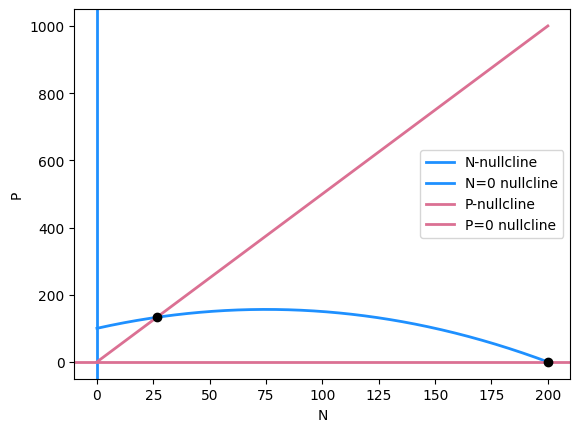

In [2]:
#nice color palette
import seaborn as sn
col = sn.color_palette("Blues",3)


N = np.linspace(0,200,500)

# paramters:
a = b = 0.01
c = 1
K = 200
R = 50
s = 5

plt.plot(N, a/c*(K-N)*(N+R), color='dodgerblue', label = 'N-nullcline', lw=2)
plt.axvline(x=0, color = 'dodgerblue', label = 'N=0 nullcline', lw=2)

plt.plot(N,s*N, color='palevioletred', label = 'P-nullcline', lw=2)
plt.axhline(y=0, color = 'palevioletred', label = 'P=0 nullcline', lw=2)

plt.plot(K,0, marker='o', color='k')

Q = c*s/a
N0 = ( -(R-K+Q) + np.sqrt((R-K+Q)**2 + 4*K*R) ) / 2
plt.plot(N0,s*N0,'ko')

plt.legend()
plt.xlabel('N')
plt.ylabel('P')
plt.show()

**3) Plot the stability of the fixed point with both N,P $\neq$ 0 in the R-K plane ( for K, R in [5, 500])**

In [3]:
def trace(M):
    return M[0,0]+M[1,1]

def determinant(M):
    return M[0,0]*M[1,1]-M[1,0]*M[0,1]

def stability(M):
    tau = trace(M)
    delta = determinant(M)
    if delta < 0:
        type_fp = 'saddle point'
    elif delta == 0:
        type_fp = 'non-isolated FP'
    else:
        if tau**2-4*delta < 0:
            type_fp_2 = 'spiral'
        elif tau**2-4*delta == 0:
            type_fp_2 = 'star'
        else:
            type_fp_2 = 'FP'
            
        if tau < 0:
            type_fp = 'stable ' + type_fp_2
        elif tau == 0:
            type_fp = 'center'
        else:
            type_fp = 'unstable ' + type_fp_2
    return type_fp

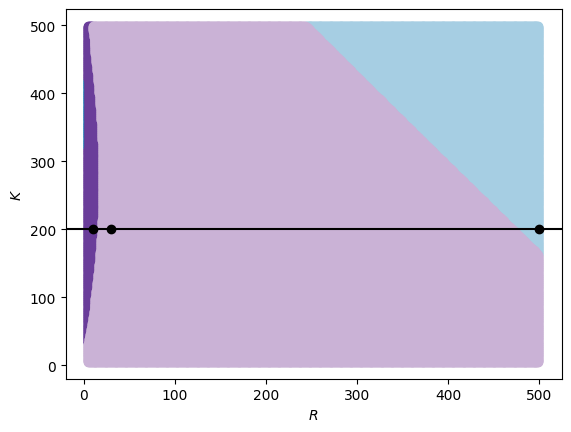

Total time: 6.2s


In [4]:
from time import time
import seaborn as sns

palette = sns.color_palette("Paired")

colorandum = {'saddle point':palette[4], 'unstable FP':palette[1], 'stable FP':palette[0], 'unstable spiral':palette[9], 'stable spiral':palette[8], 'center':'k'}

def matrix(R,K):
    Q = c*s/a
    N = ( -(R-K+Q) + np.sqrt((R-K+Q)**2 + 4*K*R) ) / 2
    P=s*N
    return np.array([[a*(K-2*N) - c*P/(N+R) * (1-N/(N+R)),
                    -c*N/(N+R)],
                    [b*s*P,
                     b*(s*N-2*P)]])

start = time()

# First, store the fixed points
dic_result = {'center':[], 'saddle point':[], 'unstable FP':[], 'stable FP':[], 'unstable spiral':[], 'stable spiral':[]}

K = np.arange(5,500,1)
R = np.arange(5,500,1)

for k in K:
    for r in R:
        M = matrix(r,k)
        type_fp = stability(M)
        dic_result[type_fp].append([r,k])
# Then, plot

for type_fp, coordinates in dic_result.items():
    # convert the list of coordinates into a 2d-array
    coordinates = np.array(coordinates)
    if coordinates.size!=0:
        # make a scatterplot for all coordinates of a given type of fp
        plt.scatter(coordinates[:,0], coordinates[:,1], label = type_fp, color=colorandum[type_fp])

plt.xlabel(r'$R$')
plt.ylabel(r'$K$')
plt.axhline(200, c = 'k')
plt.scatter(x=np.array([10,30,500]), y=np.array([200,200,200]), c = 'k')


plt.show()


end = time()

print("Total time: {:.1f}s".format(end-start))

**4) Fix K, and use the same values of the parameters for a,b,c and s as above. Choose 3 values of R for which you have respectively a stable f.p., a stable spiral and a limit cycle.**

**Simulate the trajectories (of N and P) using a python solver (ex: odeint). Plot the trajectories in function of time and the phase portrait (P in function of N) (use subplots) for the three cases with different initial conditions.**

**In the case of the limit cycle, what is the stability of the fixed point?**

> In the case of the limit cycle, the PF is unstable

In [5]:
# paramters:
a = 0.01
b = 0.01
c = 1
K = 200
s = 5
tspan = np.linspace(0,100, 10000)

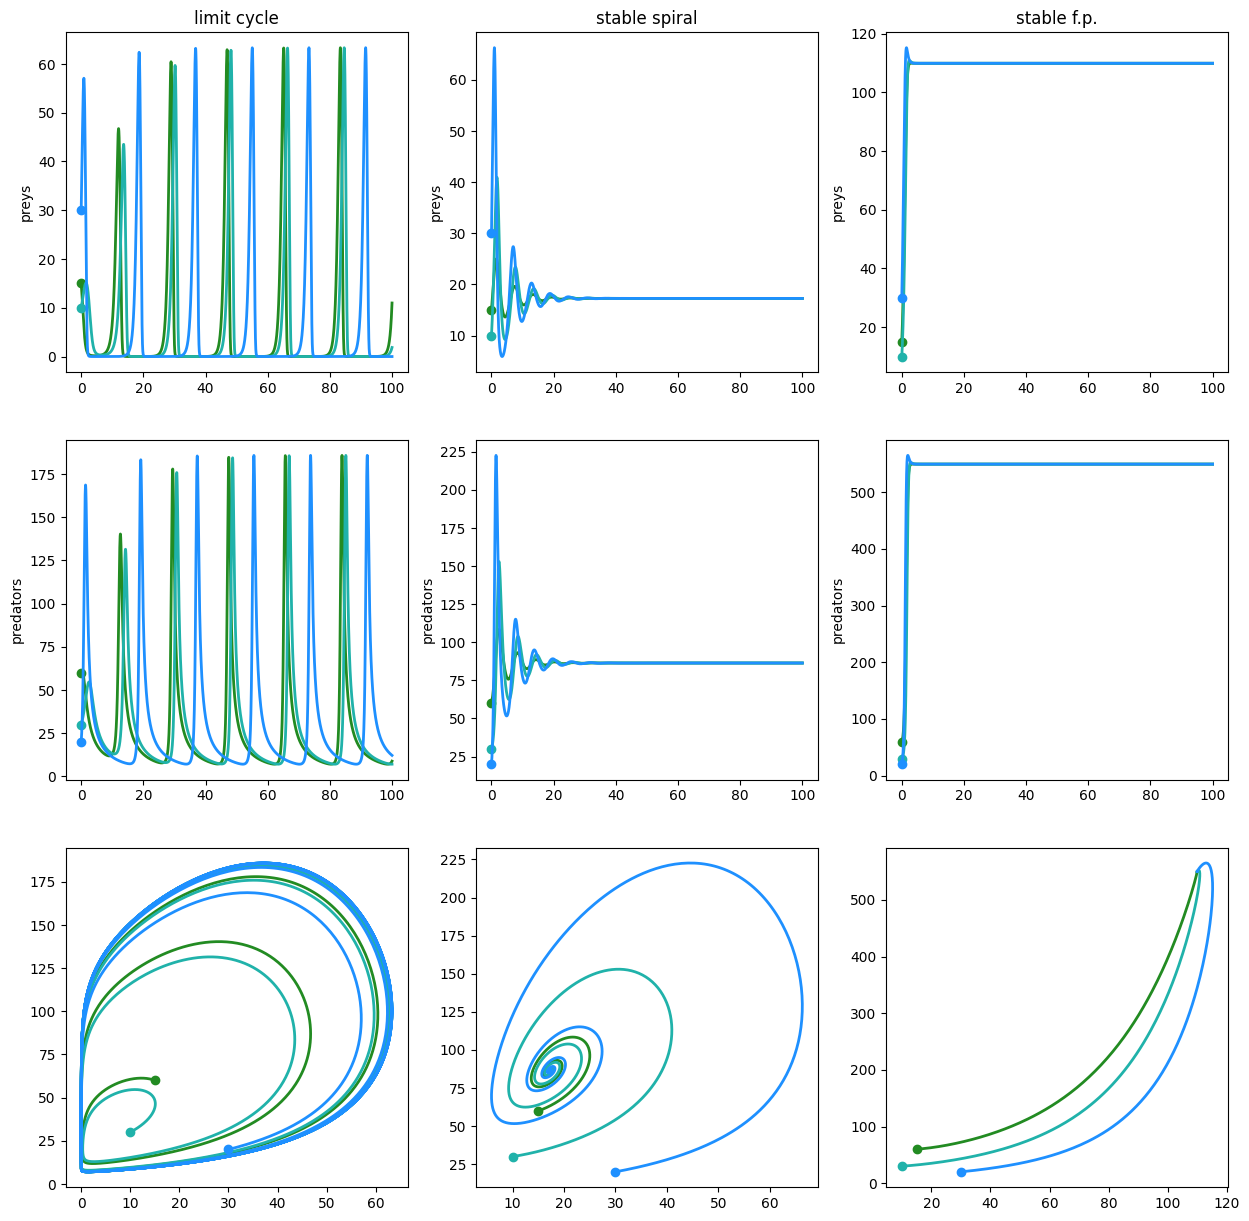

In [6]:

#2D differential equation
def Xdot(X, t):
    N = X[0]
    P = X[1]
    return np.array([a*N*(K-N)-c*P*N/(N+R), b*P*(s*N-P)])


f, axs = plt.subplots(3, 3, figsize=(15,15))
colormap=['forestgreen','lightseagreen','dodgerblue']

R_list = [10,30,500]
title_list = ["limit cycle", "stable spiral", "stable f.p."]

for j,R in enumerate(R_list):
    for n,X0 in enumerate([np.array([15,60]), np.array([10,30]), np.array([30,20])]):
        x = odeint(Xdot, X0, tspan)
        
        axs[0,j].plot(tspan, x[:,0], c=colormap[n], lw=2)
        axs[1,j].plot(tspan, x[:,1], c=colormap[n], lw=2)
        axs[2,j].plot(x[:,0], x[:,1], c=colormap[n], lw=2)
    
        axs[0,j].plot(tspan[0],x[0,0], c=colormap[n], marker='o')
        axs[1,j].plot(tspan[0],x[0,1], c=colormap[n], marker='o')
        axs[2,j].plot(x[0,0], x[0,1], c=colormap[n], marker='o')

        axs[0,j].set_ylabel("preys")
        axs[1,j].set_ylabel("predators")
        
        axs[0,j].set_title(title_list[j])
    

plt.show()
plt.close()

**5) Describe in words the behavior of the trajectories in terms of the number of predators and preys for each case.**


>In the case of stable FP, predators and preys rapidly converge to a stable coexistence, while
in the case of a stable spiral, they first oscillate for a while before reaching the stable point. 

>In the case of a limit cycle the oscillations settle to constant amplitude and slope. The trajectory
always reaches the same limit cycle independently of the starting point. First, the
preys population N grows happily. But the more preys there are, the more food
the predators have, and the population P increases. Then, the predators eat so
much preys N that at a certain point, there are almost no more preys. Suddenly,
the predators population shrinks and the cycle starts a new round with preys N
growing happily.

**6. (OPTIONAL): Check your answers using euler's method**


Euler's method is the simplest way to solve a differential equation numerically. In order to approximate the solution of :
	
$$
\dot{x} = F(x(t))  \, ,  \, x(t_0) = x_0
$$
	
We can write one step of the method as :
	
$$
x(t \, + \, dt) \simeq x(t) \, + \, dt \, F(x(t))
$$
	
for a specific timestep size dt.

**a) Implement your own Euler method using Python to solve numerically the following differential equation:**

In [7]:
#Euler's method
def Euler(xdot, x0, dt, T):
    x = x0
    t = 0
    l_x = [x0]
    l_t = [0]
    while t<T:
        x = x + xdot(x, t)*dt
        t+=dt
        l_x.append(x)
        l_t.append(t)
    return l_t, np.array(l_x)


**b) Simulate the same trajectories than in 4) using the Euler's method.**

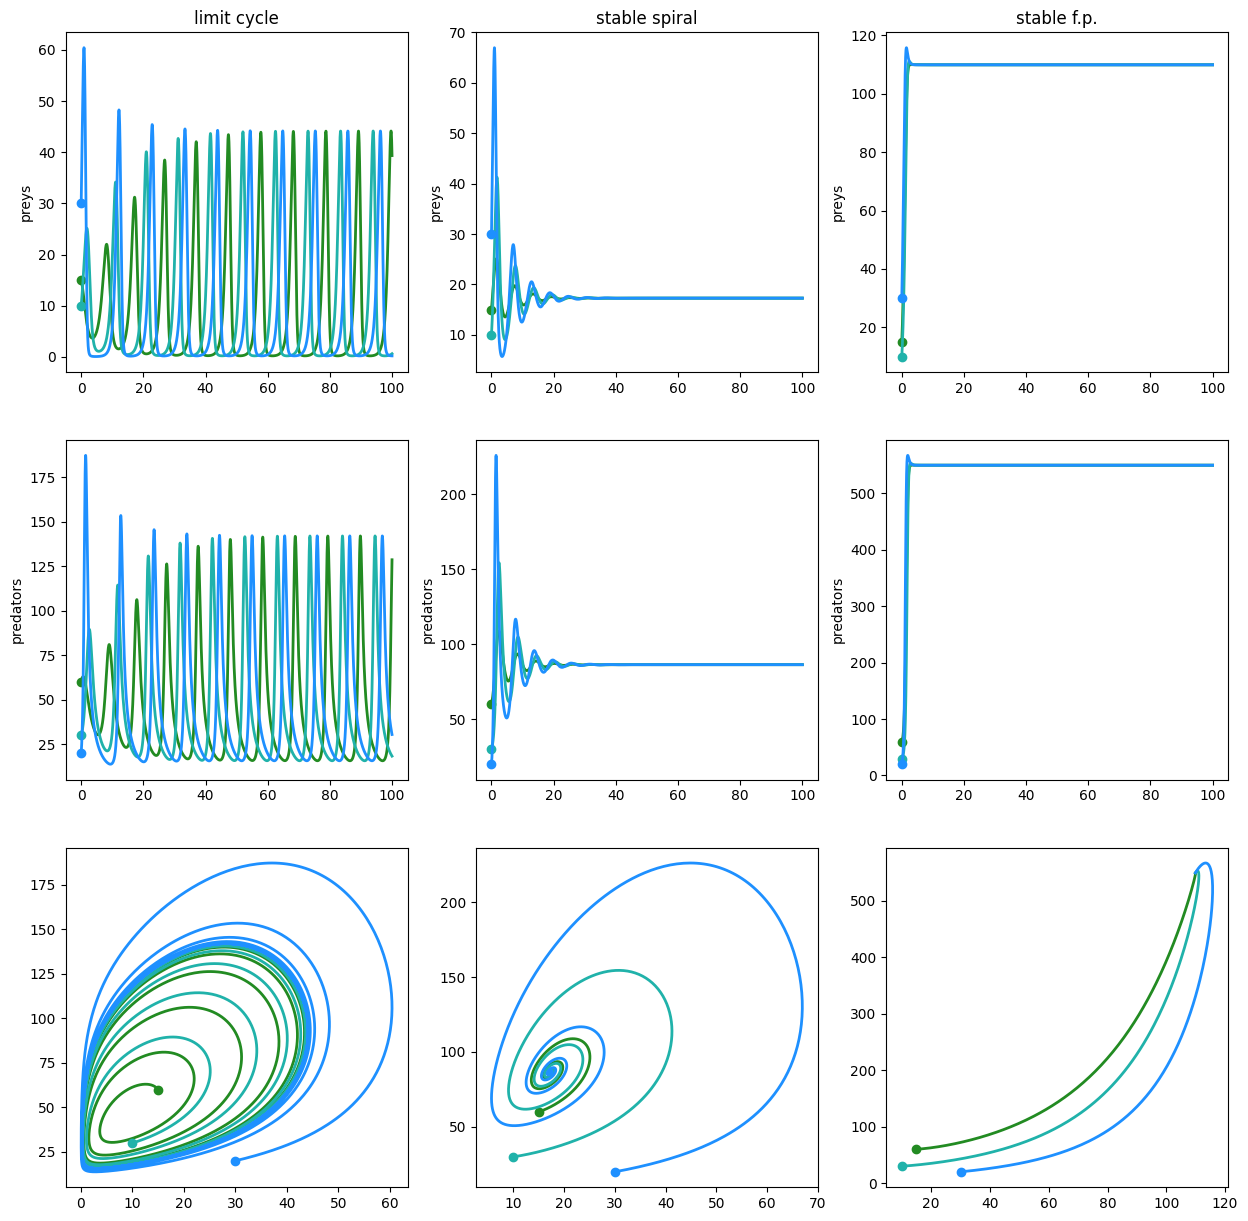

In [8]:
def Euler(xdot, x0, dt, T):
    x = x0
    t = 0
    l_x = [x0]
    l_t = [0]
    while t<T:
        x = x + xdot(x, t)*dt
        t+=dt
        l_x.append(x)
        l_t.append(t)
    return l_t, np.array(l_x) #array for l_x so it can easily be sliced for 2D systems


#2D differential equation
def Xdot(X, t):
    N = X[0]
    P = X[1]
    return np.array([a*N*(K-N)-c*P*N/(N+R), b*P*(s*N-P)])

# paramters:

a = 0.01
b = 0.01
c = 1
K = 200
s = 5

#simulation parameters
dt = 0.01
T = 100

f, axs = plt.subplots(3, 3, figsize=(15,15))
colormap=['forestgreen','lightseagreen','dodgerblue']

R_list = [15,30,500]
title_list = ["limit cycle", "stable spiral", "stable f.p."]

for j,R in enumerate(R_list):
    for n,X0 in enumerate([np.array([15,60]), np.array([10,30]), np.array([30,20])]):
        t, x = Euler(Xdot, X0, dt, T)
        axs[0,j].plot(t, x[:,0], c=colormap[n], lw=2)
        axs[1,j].plot(t, x[:,1], c=colormap[n], lw=2)
        axs[2,j].plot(x[:,0], x[:,1], c=colormap[n], lw=2)
    
        axs[0,j].plot(t[0],x[0,0], c=colormap[n], marker='o')
        axs[1,j].plot(t[0],x[0,1], c=colormap[n], marker='o')
        axs[2,j].plot(x[0,0], x[0,1], c=colormap[n], marker='o')

        axs[0,j].set_ylabel("preys")
        axs[1,j].set_ylabel("predators")
        
        axs[0,j].set_title(title_list[j])
    

plt.show()
plt.close()